# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][HW010] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [2]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import scipy.linalg

In [3]:
def read_data(path="../data/boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    maxs = np.max(X, axis=0)
    mins = np.min(X, axis=0)
    X = (X - mins) / maxs
    X = 2 * X - 1
    return X, y

In [4]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [5]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [6]:
class NormalLR:
    def __init__(self):
        pass

    def fit(self, X, y):
        X = np.hstack((X, np.ones(shape=(X.shape[0], 1))))
        Xty = X.T.dot(y)
        XtX = X.T.dot(X)
        self.w = scipy.linalg.solve(XtX, Xty)

    def predict(self, X):
        return X.dot(self.w[:-1]) + self.w[-1]

In [7]:
X, y = generate_synthetic(1024)
# X, y = read_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [8]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.010197773000412887


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации

In [29]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.iterations = iterations
        self.alpha = alpha
        self.l = l

    def fit(self, X, y):
        X = np.hstack((X, np.ones(shape=(X.shape[0], 1))))

        def grad(teta):
            return (2 * X.T.dot(X.dot(teta)) -
                    2 * X.T.dot(y)) / X.shape[0] + self.l * np.sign(teta)

        self.w = np.random.randn((X.shape[1]))
#         self.w = np.zeros(X.shape[1])
        for i in range(self.iterations):
            if i%10 == 0 or i < 10:
                print(grad(self.w)[:4])
            self.w -= self.alpha * grad(self.w)

    def predict(self, X):
        return X.dot(self.w[:-1]) + self.w[-1]

In [21]:
def build_plot(X_train, y_train, X_test, y_test, alpha=0.01, beg=-5, end=-2):
    ls = np.arange(beg, end, (end - beg) / 100)
    ys = []
    for l in ls:
        gradLR = GradientLR(alpha, iterations=1000, l=np.power(10, l))
        gradLR.fit(X_train, y_train)
        ys.append(mse(gradLR.predict(X_test), y_test))
    plt.plot(ls, ys)
    plt.xlabel('log10(l)')

In [22]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

[47041.00163913 31653.60238456 20203.10807255 38491.85065431]
[41345.56762806 27455.85303937 17906.06543009 33367.63547838]
[36349.45877077 23777.24193533 15888.23229697 28875.17126004]
[31966.75841031 20553.93069094 14115.35668961 24936.8321893 ]
[28122.10550491 17729.92508635 12557.39385424 21484.52946757]
[24749.3977781  15256.11131997 11187.98938893 18458.53960336]
[21790.65419823 13089.41066978  9984.02586817 15806.47666211]
[19195.01721232 11192.03801212  8925.22516837 13482.39078407]
[16917.87756419  9530.85143843  7993.79965083 11445.97745714]
[14920.10663638  8076.78177748  7174.14619965  9661.88393742]
[13167.38310555  6804.33220622  6452.57784942  8099.10088203]
[4012.20595462  276.62176446 2595.08238945   30.48376618]
[ 1521.67746793 -1338.19960507  1428.13091188 -2025.56973951]
[  828.76541823 -1650.46991473  1006.148112   -2466.3125769 ]
[  621.38046503 -1629.800244     801.39895739 -2477.047564  ]
[  545.78631523 -1534.52812794   668.92142029 -2377.16095877]
[  506.59992

[ 44.24990581   3.69453658 -53.05397809  17.20449896]
[ 44.34334843   3.75012453 -52.81179544  17.02044675]
[ 44.43514635   3.80392814 -52.57166533  16.83892747]
[ 44.52531531   3.8559978  -52.33356113  16.6599061 ]
[ 44.61387095   3.90638247 -52.09745654  16.48334803]
[ 44.70082888   3.95512981 -51.86332556  16.30921899]
[ 44.7862046    4.00228612 -51.63114257  16.1374851 ]
[ 44.87001354   4.04789645 -51.40088224  15.96811286]
[ 44.95227105   4.09200457 -51.17251958  15.80106913]
[ 45.03299239   4.13465306 -50.94602991  15.63632116]
[ 45.11219274   4.17588333 -50.7213889   15.4738366 ]
[ 45.18988718   4.21573563 -50.4985725   15.31358345]
[ 45.26609071   4.25424908 -50.277557    15.15553009]
[ 45.34081823   4.29146175 -50.05831901  14.9996453 ]
[ 45.41408454   4.32741063 -49.84083545  14.84589822]
[ 45.48590434   4.36213169 -49.62508353  14.69425837]
[ 45.55629225   4.3956599  -49.41104078  14.54469564]
[ 45.62526276   4.42802926 -49.19868505  14.39718031]
[ 45.69283027   4.45927283 -

[ 43.25226727   4.37111056 -23.1380622    3.47139381]
[ 43.20470427   4.36503107 -23.0637688    3.4570587 ]
[ 43.15702711   4.35894872 -22.98972472   3.44282363]
[ 43.1092374    4.35286354 -22.91592884   3.42868746]
[ 43.06133673   4.34677561 -22.84238003   3.41464905]
[ 43.0133267    4.34068498 -22.7690772    3.40070729]
[ 42.96520886   4.3345917  -22.69601926   3.38686109]
[ 42.91698478   4.32849582 -22.62320511   3.37310935]
[ 42.86865599   4.32239741 -22.5506337    3.35945102]
[ 42.82022401   4.3162965  -22.47830396   3.34588504]
[ 42.77169035   4.31019316 -22.40621483   3.33241037]
[ 42.72305651   4.30408743 -22.33436528   3.319026  ]
[ 42.67432397   4.29797937 -22.26275426   3.30573091]
[ 42.6254942    4.29186902 -22.19138076   3.29252412]
[ 42.57656864   4.28575644 -22.12024376   3.27940464]
[ 42.52754874   4.27964168 -22.04934224   3.26637152]
[ 42.47843593   4.27352479 -21.97867522   3.25342379]
[ 42.42923161   4.26740581 -21.90824169   3.24056052]
[ 42.37993718   4.2612848  -

[ 31.16261752   2.96699879 -10.92292857   1.56468255]
[ 31.1125388    2.96144522 -10.88783886   1.55992631]
[ 31.06250197   2.95589793 -10.85286053   1.55518669]
[ 31.01250723   2.95035693 -10.81799321   1.55046361]
[ 30.96255477   2.94482225 -10.78323657   1.54575698]
[ 30.91264476   2.9392939  -10.74859026   1.54106674]
[ 30.8627774    2.93377191 -10.71405392   1.5363928 ]
[ 30.81295285   2.92825628 -10.67962722   1.53173508]
[ 30.7631713    2.92274705 -10.64530981   1.52709351]
[ 30.71343292   2.91724424 -10.61110135   1.52246802]
[ 30.66373789   2.91174785 -10.5770015    1.51785853]
[ 30.61408637   2.9062579  -10.54300992   1.51326497]
[ 30.56447855   2.90077443 -10.50912626   1.50868725]
[ 30.51491458   2.89529744 -10.4753502    1.50412531]
[ 30.46539464   2.88982695 -10.44168138   1.49957908]
[ 30.41591888   2.88436297 -10.40811949   1.49504849]
[ 30.36648748   2.87890554 -10.37466417   1.49053345]
[ 30.3171006    2.87345466 -10.3413151    1.4860339 ]
[ 30.26775839   2.86801035 -

[20.28475896  1.80681886 -4.89805223  0.75526041]
[20.2475998   1.80304517 -4.88214432  0.75309415]
[20.21049448  1.79927845 -4.86628714  0.75093429]
[20.17344298  1.7955187  -4.85048053  0.74878082]
[20.13644527  1.79176591 -4.83472432  0.74663372]
[20.09950132  1.78802007 -4.81901837  0.74449296]
[20.0626111   1.78428117 -4.8033625   0.74235852]
[20.02577458  1.78054921 -4.78775655  0.74023038]
[19.98899172  1.77682417 -4.77220038  0.73810852]
[19.95226251  1.77310606 -4.75669381  0.73599292]
[19.91558691  1.76939487 -4.74123668  0.73388355]
[19.87896489  1.76569058 -4.72582886  0.73178041]
[19.84239641  1.76199319 -4.71047016  0.72968346]
[19.80588146  1.75830269 -4.69516044  0.72759268]
[19.76941998  1.75461908 -4.67989954  0.72550806]
[19.73301196  1.75094234 -4.66468731  0.72342958]
[19.69665736  1.74727247 -4.64952358  0.72135721]
[19.66035614  1.74360947 -4.63440821  0.71929093]
[19.62410829  1.73995331 -4.61934104  0.71723073]
[19.58791375  1.73630401 -4.60432191  0.71517658]


[  37.34052444 -269.19046563 -121.03139301  -24.70235048]
[  35.67018259 -261.65395963 -121.65117108  -17.76209848]
[  34.10397443 -254.31664347 -122.19308939  -11.25990071]
[  32.63678644 -247.17367747 -122.6612012    -5.17152812]
[  31.26375127 -240.22032258 -123.05935851    0.52592871]
[  29.98023559 -233.45193709 -123.39122441    5.85413202]
[  28.78182855 -226.86397388 -123.6602843    10.8335654 ]
[  27.66433085 -220.45197824 -123.86985608   15.48359851]
[  26.62374429 -214.21158603 -124.02309947   19.82254815]
[  25.65626196 -208.13852207 -124.12302456   23.86773606]
[  24.7582588  -202.22859887 -124.17249975   27.63554339]
[  23.92628275 -196.47771542 -124.174259     31.14146222]
[  23.15704626 -190.8818561  -124.13090865   34.40014421]
[  22.44741832 -185.43708974 -124.04493372   37.42544657]
[  21.79441676 -180.13956859 -123.91870388   40.23047544]
[  21.19520111 -174.98552749 -123.7544789    42.8276269 ]
[  20.64706565 -169.97128287 -123.55441394   45.2286257 ]
[  20.14743292

[ 185.49376736 -640.05444772  -20.26935077 -684.36568352]
[ 175.8838162  -621.8238384   -28.51839325 -639.43506041]
[ 166.76535381 -604.29898359  -36.10010131 -597.02105131]
[ 158.11458554 -587.41498942  -43.0849069  -556.98746228]
[ 149.90882028 -571.11725295  -49.53325681 -519.20517007]
[ 142.12643014 -555.35968253  -55.4972205  -483.55181244]
[ 134.74680937 -540.10322446  -61.02182901 -449.91148091]
[ 127.75033314 -525.31464359  -66.14619036 -418.17441844]
[ 121.11831639 -510.96551446  -70.90441921 -388.23672391]
[ 114.83297329 -497.03138713  -75.32641219 -360.00006471]
[ 108.87737742 -483.49109763  -79.43849473 -333.37139852]
[ 103.23542293 -470.32619831  -83.26396128 -308.262705  ]
[  97.89178684 -457.52048758  -86.82352674 -284.59072765]
[  92.83189249 -445.05962182  -90.13570399 -262.27672638]
[  88.04187431 -432.93079544  -93.21712002 -241.24624062]
[  83.50854391 -421.12247727  -96.082781   -221.4288631 ]
[  79.21935753 -409.62419356  -98.74629464 -202.7580241 ]
[  75.16238478

[  35.66876083 -261.53469551 -121.71446891  -17.74465145]
[  34.10261402 -254.19965542 -122.25504031  -11.24357926]
[  32.63548041 -247.05892359 -122.72182925   -5.15625799]
[  31.26249312 -240.10776134 -123.11868732    0.54021699]
[  29.97901925 -233.34152734 -123.4492772     5.86750342]
[  28.78064838 -226.75567488 -123.71708393   10.84608069]
[  27.66318157 -220.34574966 -123.92542503   15.49531453]
[  26.62262099 -214.10738795 -124.07745988   19.83351805]
[  25.65516003 -208.03631504 -124.17619823   23.87800952]
[  24.75717398 -202.12834389 -124.22450812   27.64516685]
[  23.92521105 -196.37937397 -124.22512321   31.15047908]
[  23.15598397 -190.78539014 -124.1806495    34.40859503]
[  22.44636197 -185.34246172 -124.09357172   37.43336924]
[  21.79336314 -180.04674148 -123.9662592    40.23790535]
[  21.19414722 -174.89446477 -123.80097143   42.83459712]
[  20.64600869 -169.88194855 -123.59986325   45.2351671 ]
[  20.1463703  -165.0055905  -123.36498976   47.45070327]
[  19.69277682

[  17.30767439 -122.98508688 -119.49115043   61.5039355 ]
[  17.20304632 -119.39135459 -118.99705098   62.26467848]
[  17.12400305 -115.89646848 -118.48751983   62.93483669]
[  17.06916924 -112.4977823  -117.96366006   63.51979235]
[  17.03723416 -109.1927153  -117.42652217   64.02463659]
[  17.02694865 -105.978751   -116.87710642   64.45418512]
[  17.03712217 -102.85343594 -116.316365     64.81299305]
[  17.06662011  -99.81437851 -115.74520418   65.10536881]
[  17.11436113  -96.85924766 -115.1644863    65.33538749]
[  17.17931466  -93.9857717  -114.57503169   65.50690324]
[  17.26049856  -91.19173707 -113.9776205    65.62356118]
[  17.35697681  -88.47498712 -113.37299449   65.68880853]
[  17.46785742  -85.83342088 -112.76185871   65.70590525]
[  17.59229032  -83.26499187 -112.14488311   65.67793399]
[  17.72946547  -80.76770686 -111.52270405   65.60780957]
[  17.87861094  -78.33962473 -110.89592583   65.49828797]
[47046.12683575 31657.41306502 20204.69349591 38496.03092751]
[41350.077

[  17.25297637  -91.20891661 -114.01556101   65.61842197]
[  17.34934774  -88.49170356 -113.41042941   65.68386465]
[  17.46012496  -85.84968308 -112.79879678   65.70114734]
[  17.58445786  -83.28080859 -112.18133288   65.67335323]
[  17.72153628  -80.78308676 -111.55867393   65.60339766]
[  17.87058823  -78.35457637 -110.93142406   65.49403707]
[47043.29167028 31655.33416232 20203.50921033 38494.08438191]
[41347.5809163  27457.37663678 17906.35942392 33369.6180619 ]
[36351.22931798 23778.58267051 15888.43265297 28876.93346709]
[31968.31603814 20555.11077459 14115.47524862 24938.40096774]
[28123.47637112 17730.9640055  12557.44099765 21485.92845501]
[24750.60482676 15257.0261725  11187.97421804 18459.78953383]
[21791.7175545  13090.21645782  9983.95636156 15807.59572281]
[19195.95452881 11192.74789951  8925.10831992 13483.39492826]
[16918.70432472  9531.47697641  7993.64159077 11446.88067859]
[14920.83642242  8077.33310277  7173.95230073  9662.69851118]
[13168.02782997  6804.81821469  

[  17.8781515   -78.35484486 -110.87932185   65.4784963 ]
[47045.45318773 31657.94982309 20203.63973266 38495.39943679]
[41349.48720264 27459.7814874  17906.40672125 33370.70743236]
[36352.9116422  23780.80039721 15888.40883612 28877.82535916]
[31969.80182793 20557.16215208 14115.39090422 24939.1201113 ]
[28124.78968535 17732.86729768 12557.30537601 21486.49653689]
[24751.7667693  15258.79744021 11187.79539797 18460.22557178]
[21792.7466373  13091.86982872  9983.74139498 15807.91639345]
[19196.8669903  11194.29580483  8924.86335865 13483.6148548 ]
[16919.51440914  9532.93035869  7993.37199774 11447.01268318]
[14921.55662481  8078.70159803  7173.66274752  9662.75383619]
[13168.66911105  6806.11031222  6452.04737244  8099.82607782]
[4012.63371226  277.58331362 2594.3756754    30.4659216 ]
[ 1521.86941505 -1337.56047812  1427.46805968 -2025.77178786]
[  828.88972427 -1650.00205738  1005.57291552 -2466.54991354]
[  621.48278785 -1629.44802653   800.91032531 -2477.28153489]
[  545.87924505 

[  349.58891896  -965.74182641   182.92772842 -1480.87108926]
[  331.77931708  -925.36381735   153.20754016 -1392.1435233 ]
[  314.84206967  -888.75491701   127.09252344 -1308.21247541]
[  298.73875532  -855.33449741   104.04582154 -1228.8401484 ]
[  283.43209496  -824.62053031    83.6183046  -1153.79691197]
[  268.88596739  -796.21279427    65.43381247 -1082.86196609]
[  255.06545714  -769.77890345    49.17691311 -1015.8235018 ]
[ 241.93689513 -745.04264821   34.58273641 -952.4787731 ]
[ 229.46787925 -721.7745975    21.42852745 -892.63406602]
[ 217.6273006  -699.78375086    9.52662923 -836.10456995]
[ 206.38531736 -678.91116407   -1.28135585 -782.71422101]
[ 195.71334924 -659.02438756  -11.12941525 -732.29547293]
[ 185.58406657 -640.01290504  -20.13115195 -684.68903241]
[ 175.97134483 -621.78436646  -28.38314726 -639.74359463]
[ 166.85023964 -604.26145267  -35.96774612 -597.31554104]
[ 158.19694971 -587.37928218  -42.95537785 -557.26863518]
[ 149.98877771 -571.08326286  -49.40648757 -

[ 108.88163647 -483.48309619  -79.41147357 -333.4799904 ]
[ 103.23908117 -470.31981208  -83.23701915 -308.3658515 ]
[  97.89488083 -457.51565112  -86.79665018 -284.68873489]
[  92.83445668 -445.05627116  -90.1088819  -262.36988279]
[  88.04394115 -432.92886829  -93.19034327 -241.33481797]
[  83.51014397 -421.12191316  -96.0560421  -221.51311747]
[  79.22051958 -409.62493395  -98.7195875  -202.83819677]
[  75.16313591 -398.42833786 -101.19337688 -185.24710432]
[  71.3266445  -387.52326449 -103.48875347 -168.68032606]
[  67.7002519  -376.90146548 -105.61613913 -153.08159969]
[  64.27369242 -366.55520591 -107.58514662 -138.39773836]
[  61.03720207 -356.4771835  -109.40467477 -124.57846335]
[  57.98149382 -346.66046269 -111.08298931 -111.57624557]
[  55.0977339  -337.09842074 -112.62779167  -99.3461553 ]
[  52.3775194  -327.78470388 -114.04627786  -87.84571987]
[  49.81285681 -318.71319161 -115.34518887  -77.03478908]
[  47.39614173 -309.87796773 -116.53085408  -66.87540765]
[  45.12013951

[  83.55882643 -421.15726152  -96.13908116 -221.51876435]
[  79.26856699 -409.65895976  -98.80180375 -202.84419323]
[  75.21055742 -398.46107016 -101.27478913 -185.25341252]
[  71.37344917 -387.55473361 -103.56937809 -168.68691078]
[  67.74644873 -376.93170264 -105.69599048 -153.08842821]
[  64.31929031 -366.5842428  -107.66423744 -138.40478028]
[  61.08220987 -356.50505205 -109.48301645 -124.5856905 ]
[  58.02592026 -346.68719481 -111.16059214 -111.58363183]
[  55.14158765 -337.12404814 -112.70466504  -99.35367649]
[  52.42080902 -327.80925792 -114.12243044  -87.85335366]
[  49.85559078 -318.7367032  -115.42062872  -77.04251482]
[  47.43832843 -309.90046723 -116.60558879  -66.88320631]
[  45.1617872  -301.29481405 -117.68326555  -57.33954881]
[  43.01908373 -292.91416951 -118.65927235  -48.37762333]
[  41.00366854 -284.75310593 -119.53890937  -39.96536345]
[  39.1093095  -276.80632984 -120.32718839  -32.07245339]
[  37.33007606 -269.06867203 -121.02885456  -24.67023176]
[  35.6603243 

[  35.63737443 -261.53974749 -121.63582114  -17.72535113]
[  34.07190799 -254.20507935 -122.17741918  -11.22406482]
[  32.60544188 -247.06469144 -122.6452284    -5.13657946]
[  31.23310936 -240.11384672 -123.04310011    0.56001373]
[  29.95027766 -233.34790537 -123.37469678    5.88737641]
[  28.75253649 -226.76232216 -123.64350315   10.86599155]
[  27.63568709 -220.35264421 -123.85283652   15.51522823]
[  26.59573177 -214.11450911 -124.00585601   19.85340269]
[  25.62886412 -208.04364341 -124.10557115   23.89783609]
[  24.73145957 -202.13586129 -124.15484977   27.66490902]
[  23.90006652 -196.38706335 -124.15642529   31.17011302]
[  23.1313979  -190.79323553 -124.11290355   34.42809924]
[  22.42232311 -185.35044816 -124.02676906   37.45272435]
[  21.76986043 -180.054855   -123.90039101   40.25709399]
[  21.1711698  -174.90269229 -123.73602872   42.85360374]
[  20.62354589 -169.89027787 -123.53583688   45.25397787]
[  20.12441164 -165.01401023 -123.30187046   47.46930592]
[  19.67131202

[  18.86620318 -151.22608398 -122.44436626   53.10368136]
[  18.53745457 -146.85859211 -122.09401331   54.67811877]
[  18.24603155 -142.61045216 -121.71881345   56.11459272]
[  17.99000658 -138.47852523 -121.32031228   57.42104616]
[  17.76754292 -134.45974606 -120.8999833    58.60499277]
[  17.57689032 -130.55112196 -120.45923115   59.67354012]
[  17.41638092 -126.74973167 -119.99939464   60.63341166]
[  17.28442528 -123.05272422 -119.52174966   61.49096748]
[  17.1795087  -119.45731774 -119.02751196   62.2522239 ]
[  17.10018769 -115.96079827 -118.51783977   62.92287201]
[  17.04508653 -112.5605186  -117.99383637   63.50829521]
[  17.01289414 -109.253897   -117.45655245   64.01358575]
[  17.00236102 -106.03841605 -116.90698844   64.44356042]
[  17.0122963  -102.91162139 -116.34609674   64.80277529]
[  17.04156506  -99.8711205  -115.77478377   65.0955398 ]
[  17.08908564  -96.91458145 -115.19391203   65.32592989]
[  17.15382721  -94.03973171 -114.60430199   65.49780059]
[  17.23480732

[ 206.31214975 -678.96941197   -1.38813688 -782.4408034 ]
[ 195.64200261 -659.0805828   -11.23350286 -732.03612215]
[ 185.51444966 -640.06707695  -20.23269906 -684.44295027]
[ 175.90337012 -621.83655769  -28.48228777 -639.51003003]
[ 166.78382401 -604.31171533  -36.06459776 -597.09378658]
[ 158.13201462 -587.42767504  -43.05004467 -557.05802431]
[ 149.92524908 -571.12984925  -49.49906201 -519.27361835]
[ 142.14189782 -555.37215869  -55.46370849 -483.61820494]
[ 134.7613536  -540.11555963  -60.98900653 -449.97587415]
[ 127.76399009 -525.32682486  -66.11405726 -418.23686759]
[ 121.13112085 -510.97753525  -70.87296991 -388.29728286]
[ 114.84495871 -497.04324584  -75.29563683 -360.05878611]
[ 108.88857599 -483.50279653  -79.40838016 -333.42833386]
[ 103.24586562 -470.33774264  -83.23449187 -308.31790458]
[  97.90150344 -457.53188483  -86.79468498 -284.64424067]
[  92.84091167 -445.07088112  -90.10747106 -262.32860093]
[  88.05022368 -432.94192706  -93.18947623 -241.2965237 ]
[  83.51625004

[  40.97478951 -284.82624336 -119.4886145   -39.98391445]
[  39.08023629 -276.87772765 -120.27737731  -32.09023818]
[  37.30081882 -269.13836816 -120.97952113  -24.68728995]
[  35.63089279 -261.60311128 -121.59954392  -17.74796949]
[  34.06508629 -254.26701331 -122.14171343  -11.24665406]
[  32.59828638 -247.12523532 -122.61008247   -5.15911718]
[  31.22562627 -240.17303899 -123.00850259    0.53754808]
[  29.94247318 -233.40578334 -123.34063649    5.86500163]
[  28.74441678 -226.81892196 -123.6099692    10.84372487]
[  27.62725824 -220.40800082 -123.81981824   15.49308536]
[  26.58699984 -214.16865642 -123.97334301   19.83139795]
[  25.61983511 -208.09661427 -124.07355327   23.8759825 ]
[  24.72213942 -202.18768749 -124.12331711   27.64321838]
[  23.89046111 -196.4377757  -124.1253682    31.148596  ]
[  23.12151303 -190.84286389 -124.0823126    34.40676546]
[  22.41216454 -185.39902146 -123.99663509   37.43158244]
[  21.75943383 -180.10240127 -123.87070507   40.23615168]
[  21.16048077

[  17.00943449 -109.22230044 -117.39262468   64.01271663]
[  16.99920989 -106.00759099 -116.84382282   64.44255106]
[  17.00944717 -102.88154998 -116.28368236   64.80163628]
[  17.03901158  -99.84178528 -115.71310988   65.09428106]
[  17.08682165  -96.88596535 -115.13296799   65.32456076]
[  17.15184672  -94.011818   -114.54407732   65.49632986]
[  17.23310451  -91.21712921 -113.94721833   65.61323372]
[  17.32965891  -88.49974185 -113.34313304   65.67871986]
[  17.44061781  -85.85755453 -112.73252677   65.69604847]
[  17.56513106  -83.2885203  -112.11606972   65.66830245]
[  17.7023885   -80.79064554 -111.49439852   65.59839688]
[  17.85161813  -78.36198871 -110.86811772   65.48908793]
[47040.84475193 31653.59735172 20202.32535647 38491.29050347]
[41345.44640171 27455.86529983 17905.30651033 33367.11033659]
[36349.36888388 23777.26836595 15887.49522472 28874.67720982]
[31966.69594107 20553.96856476 14114.63973378 24936.36566093]
[28122.06701383 17729.97203136 12556.69547909 21484.0873

[  298.64976174  -855.48614889   103.76154606 -1228.4920364 ]
[  283.34577675  -824.76667024    83.33867862 -1153.46513837]
[  268.80218444  -796.35393012    65.15901007 -1082.54566915]
[  254.98407696  -769.91546872    48.90705386 -1015.52187032]
[ 241.85779264 -745.17492237   34.3178955  -952.19104271]
[ 229.39092906 -721.90300176   21.16874345 -892.35952189]
[ 217.55239665 -699.90855613    9.27191373 -835.84252737]
[ 206.31235579 -679.03260753   -1.53101635 -782.46403702]
[ 195.64222529 -659.14267898  -11.37405702 -732.05654597]
[ 185.51469011 -640.12822305  -20.37082124 -684.46078664]
[ 175.90362824 -621.89686979  -28.61790307 -639.52548814]
[ 166.78409912 -604.37128217  -36.19765715 -597.10706246]
[ 158.13230574 -587.48656313  -43.18052008 -557.06930125]
[ 149.92555497 -571.18810717  -49.62694235 -519.28306745]
[ 142.14221706 -555.42982073  -55.58899639 -483.6259857 ]
[ 134.76168454 -540.17264866  -61.11171563 -449.98213514]
[ 127.76433091 -525.38335479  -66.23420999 -418.24174702

[  55.10847666 -337.14326712 -112.71126823  -99.36159793]
[  52.38761601 -327.82784993 -114.12882389  -87.86091384]
[  49.82232188 -318.75468395 -115.42681477  -77.04973118]
[  47.40498953 -309.91785201 -116.61156989  -66.8900954 ]
[  45.12838398 -301.31161774 -117.68904422  -57.34612633]
[  42.98562163 -292.93040659 -118.6648512   -48.3839042 ]
[  40.97015281 -284.76879051 -119.54429106  -39.97136181]
[  39.07574519 -276.82147568 -120.33237563  -32.07818268]
[  37.29646803 -269.08329253 -121.03385012  -24.67570474]
[  35.62667721 -261.54918778 -121.6532124   -17.73682933]
[  34.06100106 -254.21421809 -122.1947301   -11.23593524]
[  32.59432684 -247.07354488 -122.66245593   -5.14879742]
[  31.22178795 -240.1224302  -123.06024136    0.54748972]
[  29.93875178 -233.35623343 -123.39174897    5.87458485]
[  28.74080819 -226.77040852 -123.66046367   10.85296818]
[  27.6237585  -220.36050182 -123.8697029    15.50200615]
[  26.58360517 -214.12215021 -124.02262594   19.84001259]
[  25.61654185

[  17.07037204 -112.51519707 -117.97370761   63.50277041]
[  17.03821849 -109.20980243 -117.43646153   64.00815252]
[  17.02772152 -105.99551726 -116.88693792   64.43821719]
[  17.03769035 -102.86988798 -116.32608907   64.79752053]
[  17.06699012  -99.83052284 -115.75482131   65.090372  ]
[  17.11453926  -96.87509065 -115.17399705   65.32084757]
[  17.17930699  -94.0013196  -114.58443668   65.49280231]
[  17.26031094  -91.20699601 -113.98692044   65.60988215]
[  17.35661491  -88.4899631  -113.38219014   65.67553514]
[  17.46732669  -85.84811976 -112.77095087   65.69302195]
[  17.59159604  -83.27941939 -112.15387264   65.66542597]
[  17.72861273  -80.78186866 -111.53159185   65.5956627 ]
[  17.87760467  -78.35352631 -110.90471286   65.48648876]
[47050.34831298 31661.26487417 20205.9559341  38500.20508823]
[41353.77671877 27462.65544349 17908.47344709 33374.96281908]
[36356.67017979 23783.28854384 15890.25591166 28881.59790765]
[31973.09467132 20559.31283442 14117.04449982 24942.46883483

[  478.16269749 -1337.10680719   483.28937853 -2126.47661459]
[  453.34684093 -1253.96730958   412.67071569 -2004.47990782]
[  430.33063211 -1181.11705501   352.27792776 -1888.20942595]
[  408.57139175 -1117.1524815    300.32093532 -1777.85434488]
[  387.89346793 -1060.69932836   255.42141717 -1673.27136708]
[  368.22003268 -1010.56080866   216.4609378  -1574.23008072]
[  349.50106159  -965.72866223   182.51489135 -1480.48038904]
[  331.69413864  -925.36215457   152.81383294 -1391.77165815]
[  314.7594365   -888.76252156   126.71571855 -1307.85841929]
[  298.65855556  -855.34951524   103.68405153 -1228.50316219]
[  283.35421609  -824.64143655    83.26999377 -1153.47615203]
[  268.81029812  -796.23833597    65.09762837 -1082.55662449]
[  254.99188949  -769.80805169    48.85172651 -1015.53280504]
[ 241.86532509 -745.07442006   34.26758767 -952.20198164]
[ 229.39819595 -721.80845641   21.12259759 -892.37048274]
[ 217.55941669 -699.81912549    9.22922082 -835.85351438]
[ 206.31914371 -678.

[  75.17228113 -398.60221949 -101.24693512 -185.19441912]
[  71.33549803 -387.69234339 -103.54237892 -168.62983688]
[  67.70881636 -377.06587454 -105.66982452 -153.03318187]
[  64.28197073 -366.71507521 -107.63888361 -138.35127474]
[  61.04519747 -356.6326402  -109.45845425 -124.53384389]
[  57.98920978 -346.81163088 -111.13680158 -111.53336688]
[  55.10517416 -337.24542139 -112.68162667  -99.30492023]
[  52.38468787 -327.92765479 -114.10012527  -87.8060372 ]
[  49.81975761 -318.85220742 -115.39903829  -76.99657308]
[  47.40277912 -310.01315992 -116.58469508  -66.83857783]
[  45.12651788 -301.40477382 -117.66305098  -57.29617551]
[  42.98409073 -293.02147253 -118.63971981  -48.33545032]
[  40.96894841 -284.85782606 -119.52000217  -39.92433882]
[  39.07485898 -276.90853866 -120.30891024  -32.03252809]
[  37.29589204 -269.16843895 -121.0111896   -24.63135939]
[  35.62640383 -261.6324719  -121.63133847  -17.69373721]
[  34.06102299 -254.29569245 -122.17362486  -11.19404328]
[  32.59463709

[  17.7704768  -134.39932612 -120.84522332   58.58993768]
[  17.57995777 -130.49219225 -120.40500695   59.65875696]
[  17.41957857 -126.69225522 -119.9457003    60.61889417]
[  17.28774986 -122.996665   -119.46857932   61.47670959]
[  17.18295702 -119.4026406  -118.97485982   62.23821976]
[  17.10375661 -115.90746896 -118.46570009   62.90911595]
[  17.04877298 -112.50850371 -117.94220346   63.49478173]
[  17.01669514 -109.20316396 -117.40542068   64.00030953]
[  17.00627363 -105.98893311 -116.85635226   64.43051629]
[  17.01631768 -102.86335759 -116.29595064   64.78995826]
[  17.0456924   -99.82404563 -115.72512231   65.08294501]
[  17.09331623  -96.86866609 -115.14472981   65.31355263]
[  17.15815836  -93.99494714 -114.55559368   65.4856363 ]
[  17.23923644  -91.20067511 -113.95849429   65.60284205]
[  17.33561425  -88.48369322 -113.3541736    65.66861803]
[  17.44639957  -85.84190038 -112.74333683   65.68622503]
[  17.57074216  -83.27325    -112.12665412   65.6587465 ]
[  17.70783179

[4013.10577422  277.37104345 2595.49952326   30.45885072]
[ 1521.98000526 -1337.88637226  1428.30059171 -2026.08908782]
[  828.90237914 -1650.27345919  1006.24382847 -2466.93864921]
[  621.4684596  -1629.63519646   801.46838297 -2477.67722784]
[  545.85699806 -1534.3720356    668.97817363 -2377.76772994]
[  506.66204276 -1431.6096528    567.44429851 -2253.16199246]
[  478.13939922 -1337.34042719   483.86103401 -2126.84906398]
[  453.3224161  -1254.13008117   413.17063541 -2004.83671359]
[  430.30506784 -1181.22191197   352.71766477 -1888.55078422]
[  408.54468349 -1117.21013919   300.71009556 -1778.18056256]
[  387.86562353 -1060.7186566    255.76799171 -1673.58282961]
[  368.19107171 -1010.54914441   216.77157734 -1574.52722936]
[  349.47101364  -965.69206997   182.79513343 -1480.76370358]
[  331.6630411   -925.30564304   153.06829038 -1392.0416437 ]
[  314.72732591  -888.69022862   126.94823302 -1308.11552481]
[  298.62548351  -855.26484477   103.89783076 -1228.74799175]
[  283.32023

[ 134.77720429 -540.23168408  -61.15319758 -449.99876969]
[ 127.77949627 -525.44060781  -66.27617584 -418.25885981]
[ 121.14628415 -511.08909261  -71.03297793 -388.31843624]
[ 114.8597809  -497.1526759   -75.45351103 -360.07916109]
[ 108.90305896 -483.61018312  -79.56410938 -333.44798691]
[ 103.26001135 -470.44315775  -83.38807473 -308.33688843]
[  97.91531401 -457.6353907   -86.94612803 -284.66260442]
[  92.85438922 -445.17253204  -90.25678718 -262.34639024]
[  88.06337038 -433.04177084  -93.33668335 -241.31378098]
[  83.52906814 -421.2315714   -96.20082616 -221.4943652 ]
[  79.23893776 -409.73145612  -98.86282616 -202.82156921]
[  75.18104795 -398.53182691 -101.33508197 -185.2324516 ]
[  71.34405093 -387.62381853 -103.62893779 -168.66750784]
[  67.71715389 -376.99917814 -105.75481623 -153.07048455]
[  64.29009173 -366.65016666 -107.72233067 -138.38820323]
[  61.05310099 -356.56947801 -109.54038044 -124.57039305]
[  57.99689511 -346.75017301 -111.21723162 -111.56953226]
[  55.11264079

[  17.46638216 -126.76945445 -119.95910996   60.62417624]
[  17.3342017  -123.07219206 -119.48197309   61.48164789]
[  17.22906071 -119.4765385  -118.98823541   62.2428349 ]
[  17.14951577 -115.97977947 -118.47905532   62.91342731]
[  17.09419125 -112.57926742 -117.95553623   63.49880753]
[  17.06177614 -109.27242032 -117.41872897   64.0040669 ]
[  17.05102099 -106.05672046 -116.86963413   64.43402134]
[  17.06073502 -102.92971321 -116.30920423   64.79322613]
[  17.08978334  -99.88900576 -115.73834585   65.08598992]
[  17.13708435  -96.93226596 -115.15792159   65.31638798]
[  17.20160726  -94.05722102 -114.56875207   65.48827466]
[  17.28236967  -91.26165632 -113.97161774   65.60529527]
[  17.37843535  -88.54341417 -113.36726061   65.67089721]
[  17.48891206  -85.90039259 -112.75638598   65.68834063]
[  17.61294953  -83.33054413 -112.13966403   65.66070836]
[  17.74973749  -80.83187462 -111.51773139   65.5909154 ]
[  17.89850382  -78.40244201 -110.89119258   65.4817179 ]
[47042.1409404

[28125.11653091 17732.679495   12557.40903629 21487.08019597]
[24752.05649079 15258.58385131 11187.88353676 18460.77344557]
[21793.00381148 13091.63383717  9983.81584955 15808.43263228]
[19197.09563147 11194.04037648  8924.92574185 13484.10310068]
[16919.71803823  9532.65809302  7993.42372557 11447.47613228]
[14921.73833001  8078.4147732   7173.70506325  9663.19529359]
[13168.83160096  6805.81092457  6452.08136786  8100.24800554]
[4012.69655867  277.22619014 2594.36396466   30.77692522]
[ 1521.90618206 -1337.92206606  1427.44096791 -2025.50387496]
[  828.92015764 -1650.35463628  1005.53915232 -2466.30597557]
[  621.51213146 -1629.78873497   800.87268262 -2477.05564393]
[  545.90883942 -1534.59295184   668.46795539 -2377.17226086]
[  506.71724732 -1431.88651463   567.00400176 -2252.59586818]
[  478.19662912 -1337.66183934   483.47879269 -2126.31229474]
[  453.38125817 -1254.48612995   412.83687198 -2004.32841892]
[  430.36534593 -1181.60430694   352.42449119 -1888.06983873]
[  408.60628

[  83.50945423 -421.19101408  -96.01822367 -221.41475243]
[  79.22016573 -409.69100474  -98.68273768 -202.74502989]
[  75.16308926 -398.49148812 -101.15748413 -185.15883271]
[  71.32687823 -387.58360032 -103.45380517 -168.59666474]
[  67.70074099 -376.95908942 -105.58212183 -153.00228054]
[  64.2744135  -366.61021695 -107.55204625 -138.32250909]
[  61.03813335 -356.52967714 -109.37247679 -124.50708663]
[  57.98261498 -346.71053099 -111.05167884 -111.5084981 ]
[  55.09902599 -337.14615237 -112.59735363  -99.281827  ]
[  52.37896477 -327.83018423 -114.01669701  -87.7846131 ]
[  49.81443902 -318.75650287 -115.31644993  -76.97671789]
[  47.39784547 -309.91918899 -116.50294178  -66.82019712]
[  45.12195052 -301.31250423 -117.58212787  -57.27918033]
[  42.97987189 -292.9308722  -118.559622    -48.31975687]
[  40.96506116 -284.76886315 -119.4407247   -39.90986816]
[  39.07128717 -276.82118162 -120.23044811  -32.01920584]
[  37.29262028 -269.08265653 -120.93353773  -24.61911549]
[  35.62341746

[  21.19149048 -174.87256192 -123.8129894    42.85389952]
[  20.6436444  -169.86108028 -123.61144667   45.25367242]
[  20.14428611 -164.98572667 -123.37615327   47.46844669]
[  19.69096088 -160.24297939 -123.10906865   49.50870862]
[  19.28133012 -155.62939555 -122.81206154   51.38437716]
[  18.91316575 -151.14161007 -122.48691403   53.10483478]
[  18.58434492 -146.7763347  -122.13532557   54.67895662]
[  18.29284497 -142.53035701 -121.75891662   56.11513799]
[  18.03673859 -138.40053926 -121.35923224   57.4213204 ]
[  17.8141893  -134.38381739 -120.93774539   58.60501613]
[  17.62344708 -130.47719989 -120.49586021   59.67333148]
[  17.46284429 -126.67776663 -120.03491498   60.6329887 ]
[  17.33079171 -122.98266776 -119.5561851    61.49034672]
[  17.22577484 -119.38912253 -119.06088583   62.25142081]
[  17.14635036 -115.89441806 -118.55017492   62.92190107]
[  17.09114275 -112.4959082  -118.02515517   63.50716996]
[  17.05884111 -109.19101227 -117.48687682   64.01231884]
[  17.04819608

[31971.64682425 20558.18633614 14115.74846383 24941.14556774]
[28126.41325413 17733.7260448  12557.57684372 21488.31948168]
[24753.19613004 15259.51101113 11187.99159037 18461.87061092]
[21794.0056652  13092.45599828  9983.87179632 15809.40511134]
[19197.97662716 11194.77016727  8924.93628462 13484.96618548]
[16920.49302373  9533.30659551  7993.39473907 11448.2432359 ]
[14922.42032903  8078.99171291  7173.64169598  9663.87818108]
[13169.43203716  6806.32483711  6451.98813133  8100.85699637]
[4012.8716501   277.4022282  2594.12546283   30.99948448]
[ 1521.96659677 -1337.84925556  1427.17761203 -2025.3871784 ]
[  828.94965997 -1650.31966789  1005.28148182 -2466.21953556]
[  621.53331192 -1629.77221513   800.62732349 -2476.97908899]
[  545.92779379 -1534.58818596   668.23534852 -2377.10009395]
[  506.73562205 -1431.89048092   566.78313809 -2252.52658964]
[  478.21486919 -1337.67271316   483.26845315 -2126.24547282]
[  453.39948307 -1254.50258131   412.63593133 -2004.26390232]
[  430.38357

[  298.65324174  -855.61054411   103.80937183 -1228.47901801]
[  283.34874892  -824.88849649    83.38629816 -1153.45508484]
[  268.80465921  -796.47303081    65.20620592 -1082.53835338]
[  254.98606173  -770.03173673    48.95365231 -1015.51708066]
[ 241.85929413 -745.28765968   34.36375963 -952.18858051]
[ 229.39190395 -722.01287009   21.21376297 -892.35924103]
[ 217.55288901 -700.01551199    9.3160192  -835.84421952]
[ 206.31238265 -679.13664819   -1.48788408 -782.46752927]
[ 195.64175807 -659.24384162  -11.33196668 -732.06171404]
[ 185.5137633  -640.22652257  -20.32979256 -684.46746218]
[ 175.9022588  -621.99234516  -28.5779506  -639.5335285 ]
[ 166.78229729 -604.46398483  -36.1587891  -597.11634009]
[ 158.13008004 -587.57655142  -43.14273805 -557.07969865]
[ 149.92291357 -571.27544378  -49.59024222 -519.29447552]
[ 142.13916811 -555.51457123  -55.55336939 -483.63830292]
[ 134.75823624 -540.25488045  -61.07714923 -449.99526706]
[ 127.76049156 -525.46313625  -66.20068873 -418.25560584

[  71.36466469 -387.57371138 -103.5551562  -168.69058705]
[  67.73757304 -376.9499925  -105.68175415 -153.09184139]
[  64.31032588 -366.60187957 -107.649971   -138.40794918]
[  61.0731591  -356.522066   -109.46870801 -124.58863284]
[  58.0167855  -346.70361245 -111.1462329  -111.58636427]
[  55.13237118 -337.13989285 -112.69024876  -99.35621464]
[  52.41151306 -327.82455049 -114.10795291  -87.85571216]
[  49.8462175  -318.75146227 -115.40608744  -77.04470736]
[  47.42887991 -309.91470964 -116.59098263  -66.8852457 ]
[  45.15226549 -301.30855515 -117.66859447  -57.34144701]
[  43.0094908  -292.92742339 -118.6445372   -48.37939149]
[  40.99400631 -284.76588567 -119.5241117   -39.96701194]
[  39.09957983 -276.81864764 -120.3123303   -32.07399189]
[  37.32028076 -269.08053933 -121.0139386   -24.67166927]
[  35.65046513 -261.5465072  -121.63343477  -17.73294543]
[  34.08476136 -254.2116077  -122.17508668  -11.23219915]
[  32.61805686 -247.07100211 -122.64294719   -5.14520541]
[  31.24548513

[  19.6555776  -160.25365506 -123.02666152   49.51296811]
[  19.2462908  -155.63960647 -122.7313079    51.3887368 ]
[  18.87846838 -151.15137186 -122.40778123   53.10928537]
[  18.54998742 -146.78566252 -122.05778161   54.68348948]
[  18.25882519 -142.53926555 -121.68293019   56.11974495]
[  18.00305432 -138.4090428  -121.28477266   57.42599376]
[  17.78083827 -134.39192976 -120.86478263   58.60974864]
[  17.59042698 -130.4849345  -120.42436484   59.67811633]
[  17.43015275 -126.6851365  -119.9648582    60.63781945]
[  17.29842632 -122.98968551 -119.4875387    61.49521735]
[  17.19373316 -119.39580038 -118.99362216   62.25632565]
[  17.1146299  -115.90076787 -118.48426691   62.92683477]
[  17.05974099 -112.50194145 -117.96057631   63.5121275 ]
[  17.02775551 -109.1967401  -117.42360114   64.01729551]
[  17.01742407 -105.98264708 -116.87434192   64.44715506]
[  17.02755595 -102.8572087  -116.31375111   64.80626172]
[  17.05701636  -99.81803309 -115.74273521   65.09892445]
[  17.10472377

[47045.80551066 31656.22181467 20205.79222313 38495.24463404]
[41349.80203607 27458.06141955 17908.50992012 33370.51912539]
[36353.19366803 23779.092282   15890.46647403 28877.60776449]
[31970.05508196 20555.46831891 14117.40517984 24938.8769135 ]
[28125.01770682 17731.18971929 12559.27827927 21486.23097093]
[24751.97266194 15257.13777778 11189.72873457 18459.94047819]
[21792.93312285 13090.22947144  9985.6368079  15807.61426673]
[19197.03645545 11192.67590459  8926.72234709 13483.29788581]
[16919.6689467   9531.33186044  7995.19593369 11446.68279637]
[14921.69806985  8077.1252664   7175.45289035  9662.4127223 ]
[13168.79907257  6804.55675491  6453.80488172  8099.47522246]
[4012.7037127   276.26822387 2595.85521361   30.06880842]
[ 1521.92290904 -1338.65287065  1428.72932754 -2026.17352815]
[  828.93819124 -1650.9031291   1006.6556955  -2466.94414954]
[  621.52914366 -1630.18874521   801.84502899 -2477.66436678]
[  545.9241429  -1534.87160399   669.31954546 -2377.75239882]
[  506.73062

[ 114.86491934 -497.00666066  -75.3678677  -360.22057822]
[ 108.90756989 -483.46904764  -79.47894465 -333.57916675]
[ 103.26395937 -470.30661792  -83.30346717 -308.45847311]
[  97.91875911 -457.50319013  -86.86214017 -284.77519662]
[  92.85738717 -445.04443831  -90.1734683  -262.45055572]
[  88.06597299 -432.91757236  -93.25407182 -241.41005085]
[  83.53132351 -421.11107473  -96.11895132 -221.58323814]
[  79.24089056 -409.61448371  -98.78170997 -202.90351346]
[  75.1827396  -398.41821521 -101.25474031 -185.30790686]
[  71.34551986 -387.51341631 -103.54938152 -168.736887  ]
[  67.71843571 -376.89184512 -105.67605216 -153.13417536]
[  64.29121942 -366.54577231 -107.64436227 -138.44656984]
[  61.0541051  -356.4679005  -109.46320845 -124.62377743]
[  57.99780388 -346.65129838 -111.14085459 -111.61825558]
[  55.1134803  -337.08934692 -112.68500063  -99.38506191]
[  52.39272985 -327.77569563 -114.10284136  -87.8817119 ]
[  49.8275575  -318.70422687 -115.40111677  -77.06804412]
[  47.41035743

[  31.24174068 -240.1454269  -122.89784227    0.53982758]
[  29.95884344 -233.37861992 -123.23196322    5.8664875 ]
[  28.76103311 -226.79221087 -123.50324397   10.84447774]
[  27.64411133 -220.38174485 -123.71500293   15.4931619 ]
[  26.6040808  -214.14285759 -123.87040035   19.8308511 ]
[  25.63713545 -208.07127384 -123.97244684   23.87486172]
[  24.73965103 -202.16280606 -124.02401127   27.64156988]
[  23.90817623 -196.41335326 -124.02782811   31.14646292]
[  23.13942426 -190.81889986 -123.98650416   34.40418806]
[  22.43026476 -185.37551475 -123.90252494   37.42859831]
[  21.77771624 -180.07935032 -123.77826055   40.23279588]
[  21.17893885 -174.92664151 -123.61597124   42.82917313]
[  20.63122746 -169.91370492 -123.41781259   45.22945134]
[  20.13200517 -165.03693789 -123.18584045   47.44471724]
[  19.67881711 -160.29281755 -122.9220155    49.48545759]
[  19.26932455 -155.67789984 -122.62820771   51.36159179]
[  18.90129929 -151.1888186  -122.30620037   53.08250276]
[  18.57261837

[  19.29125055 -155.71250376 -122.77117556   51.36874666]
[  18.92280238 -151.22280758 -122.44687354   53.08978465]
[  18.59370697 -146.85566711 -122.09611238   54.66445819]
[  18.30194129 -142.60786887 -121.72051297   56.10116417]
[  18.0455777  -138.47627414 -121.32162078   57.40784558]
[  17.82277938 -134.45781786 -120.9009092    58.59201609]
[  17.63179603 -130.54950753 -120.45978275   59.66078332]
[  17.4709597  -126.7484221  -119.99958012   60.62087075]
[  17.33868088 -123.05171077 -119.52157708   61.4786385 ]
[  17.23344482 -119.45659187 -119.02698924   62.24010294]
[  17.15380793 -115.96035162 -118.51697474   62.9109552 ]
[  17.09839445 -112.560343   -117.99263671   63.49657873]
[  17.06589323 -109.25398445 -117.45502573   64.00206583]
[  17.05505468 -106.03875874 -116.90514213   64.43223332]
[  17.06468791 -102.91221169 -116.34393817   64.79163735]
[  17.09365792  -99.87195093 -115.77232017   65.0845874 ]
[  17.140883    -96.91564473 -115.1911505    65.31515946]
[  17.20533225

[  478.27348616 -1337.93766983   484.05611369 -2126.99724924]
[  453.45465351 -1254.67596862   413.328218   -2004.97824919]
[  430.4352685  -1181.72419888   352.84417861 -1888.68585973]
[  408.67285865 -1117.67516288   300.81093251 -1778.30926017]
[  387.9918058  -1061.15168582   255.84762814 -1673.70526757]
[  368.31528955 -1010.9545797    216.8337253  -1574.64357127]
[  349.59329841  -966.07358572   182.84287299 -1480.87414111]
[  331.78342798  -925.66630921   153.10417755 -1392.14638691]
[  314.84568371  -889.0327328    126.97431722 -1308.21296787]
[  298.74196525  -855.59125324   103.91591621 -1228.84035295]
[  283.43493408  -824.85927123    83.47928165 -1153.79668883]
[  268.88843321  -796.43607961    65.28779061 -1082.86124241]
[  255.06754102  -769.98887165    49.02563644 -1015.82223794]
[ 241.93858963 -745.23879012   34.42764082 -952.47695029]
[ 229.46899757 -721.96094656   21.27077986 -892.63182779]
[ 217.62797619 -699.96143615    9.36724247 -836.10180293]
[ 206.38558682 -679.

[  52.3881302  -327.76955982 -114.04172199  -87.81217453]
[  49.82355961 -318.69738797 -115.34105066  -77.0044496 ]
[  47.40691475 -309.86154877 -116.52712565  -66.84806392]
[  45.13096245 -301.25630417 -117.60590243  -57.30714944]
[  42.98882084 -292.87607812 -118.58299484  -48.34779778]
[  40.97394188 -284.7154413  -119.46370346  -39.93795248]
[  39.08009478 -276.76909874 -120.25304037  -32.04730716]
[  37.30135025 -269.03187988 -120.95575102  -24.64720928]
[  35.63206556 -261.49873059 -121.57633348  -17.71056915]
[  34.06687033 -254.16470679 -122.11905557  -11.21177397]
[  32.60065307 -247.02496922 -122.58797013   -5.12660667]
[  31.22854835 -240.0747794  -122.98692877    0.56783087]
[  29.94592467 -233.3094962  -123.3195942     5.89319025]
[  28.74837295 -226.72457316 -123.58945144   10.86994504]
[  27.6316955  -220.31555629 -123.79981804   15.51745543]
[  26.59189572 -214.07808216 -123.95385338   19.85402934]
[  25.62516818 -208.00787639 -124.05456723   23.8969801 ]
[  24.72788924

[  17.20515072 -119.39975277 -118.99933288   62.24980923]
[  17.12590412 -115.90469389 -118.49005468   62.92039747]
[  17.07087333 -112.50584237 -117.96643823   63.50576953]
[  17.0387474  -109.20061712 -117.42953439   64.01101696]
[  17.02827693 -105.98650132 -116.88034377   64.4409559 ]
[  17.03827119 -102.86104121 -116.31981889   64.80014186]
[  17.06759536  -99.82184487 -115.74886634   65.09288368]
[  17.11516791  -96.86658096 -115.16834876   65.32325683]
[  17.17995809  -93.99297753 -114.57908678   65.49511585]
[  17.26098356  -91.19882076 -113.98186083   65.6121062 ]
[  17.35730815  -88.48195375 -113.37741296   65.67767547]
[  17.46803968  -85.84027528 -112.76644846   65.69508395]
[  17.59232793  -83.27173865 -112.14963753   65.66741463]
[  17.7293627   -80.77435042 -111.5276168    65.59758267]
[  17.87837193  -78.34616928 -110.90099078   65.48834433]
[47041.81201824 31654.11356227 20203.72753404 38492.8131088 ]
[41346.27507779 27456.28759704 17906.63753343 33368.4999185 ]
[36350

[  25.61345962 -207.98841866 -124.05087145   23.88209766]
[  24.71615668 -202.08198916 -124.10098729   27.64907362]
[  23.88486325 -196.33452221 -124.10338094   31.1542108 ]
[  23.1162924  -190.74200364 -124.0606588    34.41215786]
[  22.40731366 -185.30050372 -123.97530596   37.43676912]
[  21.75494543 -180.00617614 -123.84969214   40.24114807]
[  21.15634773 -174.85525714 -123.68607717   42.83768826]
[  20.60881536 -169.84406458 -123.48661625   45.23811209]
[  20.10977133 -164.968997   -123.25336483   47.45350736]
[  19.65676068 -160.22653269 -122.98828325   49.49436181]
[  19.24744461 -155.61322876 -122.69324105   51.37059581]
[  18.87959486 -151.12572014 -122.37002118   53.09159316]
[  18.55108839 -146.76071859 -122.02032389   54.66623026]
[  18.25990237 -142.51501165 -121.64577043   56.1029036 ]
[  18.00410935 -138.38546161 -121.24790662   57.40955583]
[  17.78187267 -134.36900439 -120.82820618   58.59370033]
[  17.5914422  -130.46264848 -120.38807396   59.66244439]
[  17.43115016

[36358.64209625 23783.24649125 15891.43208177 28882.70473625]
[31974.84996286 20559.12669533 14118.12127458 24943.38226161]
[28129.23931872 17734.41212313 12559.77667528 21490.21722273]
[24755.69142045 15259.97673611 11190.03731851 18463.47125029]
[21796.21079255 13092.73107871  9985.78002173 15810.74535977]
[19199.92721277 11194.88061251  8926.72161158 13486.07824478]
[16922.22031218  9533.27517091  7995.07001998 11449.1553529 ]
[14923.95172587  8078.83833922  7175.21824577  9664.61513345]
[13170.7915806   6806.0669409   6453.47591562  8101.44051878]
[4013.33384902  276.68702065 2595.07255796   30.79141904]
[ 1522.18498176 -1338.57183925  1427.87594468 -2025.7953149 ]
[  829.10030337 -1650.94843989  1005.82733945 -2466.66802376]
[  621.66360934 -1630.29657053   801.06127159 -2477.42479916]
[  546.05048266 -1535.01908921   668.58045533 -2377.53147164]
[  506.85412131 -1432.24234541   567.05569892 -2252.94070496]
[  478.3301053  -1337.95891863   483.48122992 -2126.64180715]
[  453.51172

[  55.12966443 -337.14773268 -112.66767722  -99.32713265]
[  52.40908309 -327.83193306 -114.08604476  -87.82846474]
[  49.84404952 -318.75840464 -115.38483682  -77.01918472]
[  47.42695995 -309.92122908 -116.57038249  -66.86134445]
[  45.15058033 -301.31466895 -117.6486368   -57.31906981]
[  43.00802793 -292.93314869 -118.62521325  -48.35844673]
[  40.99275392 -284.77123934 -119.50541213  -39.94741337]
[  39.09852673 -276.82364621 -120.2942453   -32.05565834]
[  37.31941638 -269.08519891 -120.99645802  -24.65452433]
[  35.64977946 -261.55084344 -121.61654819  -17.71691721]
[  34.08424493 -254.21563574 -122.1587835   -11.21721998]
[  32.61770071 -247.07473656 -122.6272167    -5.13121164]
[  31.24528079 -240.12340735 -123.0256993     0.56400965]
[  29.96235313 -233.35700688 -123.35789394    5.89009897]
[  28.7645081  -226.77098859 -123.62728558   10.86753317]
[  27.64754757 -220.36089829 -123.83719171   15.51567553]
[  26.60747445 -214.12237238 -123.99077166   19.85283687]
[  25.64048286

[  17.28947905 -123.05465236 -119.57285148   61.48973685]
[  17.18447376 -119.4594568  -119.07735829   62.25081883]
[  17.10506385 -115.96313885 -118.566457     62.92130478]
[  17.0498737  -112.56305157 -118.0412503    63.50657741]
[  17.01759234 -109.25661354 -117.50278834   64.01172832]
[  17.00697035 -106.04130762 -116.952071     64.44157366]
[  17.01681694 -102.91467971 -116.39005012   64.80066893]
[  17.04599728  -99.87433756 -115.81763163   65.09332301]
[  17.09342978  -96.91794951 -115.2356775    65.32361132]
[  17.15808366  -94.04324328 -114.64500772   65.49538839]
[  17.23897656  -91.24800471 -114.0464021    65.61229968]
[  17.33517225  -88.53007657 -113.44060207   65.67779274]
[  17.44577853  -85.88735733 -112.82831235   65.69512783]
[  17.56994514  -83.31779995 -112.21020255   65.66738789]
[  17.70686182  -80.81941068 -111.58690873   65.59748805]
[  17.85575649  -78.39024785 -110.95903485   65.48818451]
[47034.2089548  31648.76660095 20200.4848645  38485.59597126]
[41339.614

[  268.90117539  -796.27039059    65.06201319 -1082.79069146]
[  255.08083429  -769.83712325    48.81315005 -1015.75323671]
[ 241.95242122 -745.09522129   34.226768   -952.40956484]
[ 229.48304664 -721.82818979   21.08008811 -892.56635021]
[ 217.64245015 -699.83794229    9.18561848 -836.03806026]
[ 206.40052601 -678.96574877   -1.61512795 -782.64886346]
[ 195.72824909 -659.07940409  -11.45638638 -732.23158009]
[ 185.598902   -640.06806336  -20.45140898 -684.62638697]
[ 175.98618863 -621.83952448  -28.696828   -639.68213352]
[ 166.86509836 -604.31652453  -36.27500848 -597.25525726]
[ 158.21181261 -587.43420133  -43.25638083 -557.20953398]
[ 150.00362988 -571.13797168  -49.70138636 -519.41580109]
[ 142.21891582 -555.38175922  -55.66208877 -483.75165637]
[ 134.8370595  -540.12652326  -61.18351387 -450.101153  ]
[ 127.83843143 -525.3390401   -66.30476514 -418.35449772]
[ 121.20434224 -510.99089456  -71.0599533  -388.40775525]
[ 114.91700206 -497.0576459   -75.47897157 -360.16256091]
[ 108.

[  26.63925049 -214.15081804 -123.95756523   19.81875346]
[  25.67195191 -208.07942659 -124.05784728   23.86360673]
[  24.77412318 -202.17113344 -124.10768173   27.63110284]
[  23.94231259 -196.42183863 -124.1098023    31.13673256]
[  23.17323296 -190.82752755 -124.0668151    34.39514629]
[  22.46375361 -185.38427002 -123.98120496   37.42020006]
[  21.81089271 -180.08821927 -123.85534131   40.22499887]
[  21.21181009 -174.93561106 -123.69148374   42.82193776]
[  20.66380033 -169.92276278 -123.49178721   45.22274048]
[  20.16428626 -165.04607246 -123.25830695   47.43849609]
[  19.71081274 -160.30201793 -122.99300304   49.47969353]
[  19.30104079 -155.68715578 -122.69774484   51.35625428]
[  18.93274199 -151.19812045 -122.37431509   53.07756317]
[  18.60379315 -146.83162318 -122.02441383   54.65249758]
[  18.31217127 -142.58445102 -121.64966213   56.0894549 ]
[  18.05594874 -138.45346575 -121.25160562   57.39637863]
[  17.8332888  -134.4356028  -120.83171785   58.58078294]
[  17.64244116

[28129.47217663 17736.0201776  12559.44971055 21490.74020144]
[24755.87858064 15261.52891709 11189.71008645 18463.95292011]
[21796.35787293 13094.23196313  9985.45440943 15811.19077295]
[19200.0391415  11196.3342573   8926.39923775 13486.49183095]
[16922.30141241  9534.68517608  7994.75226862 11449.54099563]
[14924.00579007  8080.20790328  7174.90629565  9664.9762374 ]
[13170.82193574  6807.39890938  6453.17076615  8101.78006856]
[4013.24084486  277.74661827 2594.86406189   31.01712401]
[ 1522.0593086  -1337.68673864  1427.77359915 -2025.60312371]
[  828.96658548 -1650.1942476   1005.81887297 -2466.48831702]
[  621.52862316 -1629.6472687    801.13108705 -2477.25235743]
[  545.91616237 -1534.45583399   668.71417011 -2377.36519513]
[  506.72107059 -1431.7502497    567.24101021 -2252.78049043]
[  478.19854857 -1337.52584057   483.70785018 -2126.48772923]
[  453.38176874 -1254.35053016   413.0587075  -2004.49476154]
[  430.36435751 -1181.46962457   352.63957455 -1888.22768767]
[  408.60405

[ 103.22542049 -470.27775332  -83.21686211 -308.432001  ]
[  97.88078078 -457.47407308  -86.7775486  -284.75160151]
[  92.81994362 -445.01513296  -90.09082486 -262.42964348]
[  88.02903995 -432.88813471  -93.17331688 -241.3916396 ]
[  83.49487812 -421.08155381  -96.04003013 -221.5671574 ]
[  79.20491126 -409.58492254  -98.70457191 -202.88960346]
[  75.14720608 -398.38865159 -101.17933827 -185.29601785]
[  71.31041294 -387.48388354 -103.47567143 -168.72687864]
[  67.68373732 -376.86237257 -105.60399254 -153.1259161 ]
[  64.25691248 -366.51638592 -107.57391388 -138.43993641]
[  61.02017347 -356.43862322 -109.39433401 -124.61865428]
[  57.96423234 -346.6221505  -111.07351854 -111.61453443]
[  55.08025446 -337.06034642 -112.61916891  -99.38264131]
[  52.35983609 -327.74685841 -114.03848124  -87.88049677]
[  49.79498297 -318.67556703 -115.33819671  -77.06794541]
[  47.37808996 -309.84055697 -116.52464497  -66.90702711]
[  45.10192171 -301.23609369 -117.60378159  -57.36185645]
[  42.95959431

[  27.59645571 -220.35985894 -123.75493619   15.50598461]
[  26.55668427 -214.12144285 -123.90998184   19.84371526]
[  25.58999456 -208.0503137  -124.01168307   23.8877486 ]
[  24.69276231 -202.14228472 -124.0629085    27.65446228]
[  23.86153625 -196.39325565 -124.06639233   31.15934505]
[  23.09302955 -190.79921161 -124.02474115   34.41704545]
[  22.3841119  -185.35622213 -123.94044024   37.44141773]
[  21.73180182 -180.06044022 -123.81585951   40.24556523]
[  21.13325946 -174.90810141 -123.65325899   42.8418814 ]
[  20.58577974 -169.89552285 -123.45479411   45.24208849]
[  20.08678578 -165.0191024  -123.22252051   47.45727416]
[  19.63382275 -160.27531768 -122.95839873   49.49792603]
[  19.22455193 -155.66072513 -122.66429856   51.37396431]
[  18.85674518 -151.171959   -122.34200315   53.09477266]
[  18.52827956 -146.8057304  -121.99321296   54.66922731]
[  18.23713234 -142.55882622 -121.61954948   56.10572462]
[  17.98137614 -138.42810813 -121.22255874   57.41220708]
[  17.75917442

[24752.36763595 15256.70142261 11190.07209485 18460.83357768]
[21793.27469732 13089.7647007   9985.94974808 15808.45545837]
[19197.331246   11192.18742925  8927.007683   13484.09317996]
[16919.92275565  9530.82379082  7995.45615368 11447.43746814]
[14921.91598613  8076.60118641  7175.69019518  9663.13140183]
[13168.98555934  6804.01978705  6454.02121956  8100.16197413]
[4012.72829976  275.70569932 2595.93127005   30.57564016]
[ 1521.90668671 -1339.16684598  1428.72718384 -2025.73442343]
[  828.91355442 -1651.35767051  1006.59971924 -2466.54102932]
[  621.50460448 -1630.58848053   801.74810697 -2477.28733629]
[  545.90179921 -1535.22407104   669.19037911 -2377.39759079]
[  506.71086994 -1432.37849165   567.59970903 -2252.81339869]
[  478.19080076 -1338.03931351   483.96949675 -2126.52121383]
[  453.37582193 -1254.76957196   413.24056939 -2004.52824602]
[  430.3596901  -1181.81109341   352.75600343 -1888.26073293]
[  408.60053323 -1117.75605514   300.72280565 -1777.90741821]
[  387.92268

[ 103.20789779 -470.32676483  -83.25799361 -308.29791   ]
[  97.86433929 -457.52212354  -86.81669076 -284.62508225]
[  92.80451876 -445.06227522  -90.12803327 -262.31027611]
[  88.01457072 -432.93441644  -93.20864712 -241.27902785]
[  83.48130689 -421.12701814  -96.07353745 -221.46092722]
[  79.1921836  -409.62960858  -98.73631097 -202.78940176]
[  75.13527057 -398.43259496 -101.20936298 -185.20151127]
[  71.299221   -387.52711673 -103.50403474 -168.63775245]
[  67.67324307 -376.90492531 -105.63074634 -153.04187312]
[  64.24707258 -366.55828549 -107.59910893 -138.36069601]
[  61.010947   -356.47989469 -109.41801987 -124.54395146]
[  57.95558064 -346.66281699 -111.09574351 -111.54411892]
[  55.07214102 -337.10042929 -112.63998001  -99.31627674]
[  52.35222645 -327.78637742 -114.05792421  -87.81795987]
[  49.78784457 -318.71454051 -115.356316    -77.00902531]
[  47.37139208 -309.87900198 -116.54148373  -66.85152458]
[  45.09563534 -301.2740261  -117.61938172  -57.30958329]
[  42.95369207

[  19.3089931  -155.72061721 -122.79734878   51.36778017]
[  18.94046183 -151.23087564 -122.47243588   53.08856606]
[  18.61128155 -146.8636886  -122.12107686   54.66300435]
[  18.31942939 -142.61584267 -121.74489228   56.09949099]
[  18.06297787 -138.48419918 -121.34542729   57.40596809]
[  17.84009032 -134.46569315 -120.92415496   58.58994848]
[  17.64901656 -130.55733213 -120.48247951   59.65853899]
[  17.48808876 -126.75619511 -120.02173933   60.61846236]
[  17.35571756 -123.05943137 -119.54320991   61.476078  ]
[  17.25038829 -119.46425926 -119.0481066    62.2374016 ]
[  17.17065749 -115.96796507 -118.53758725   62.90812368]
[  17.11514948 -112.56790183 -118.01275474   63.49362706]
[  17.08255322 -109.26148803 -117.4746594    63.99900349]
[  17.07161922 -106.04620648 -116.92430132   64.42906926]
[  17.08115665 -102.91960304 -116.36263252   64.78838   ]
[  17.11003059  -99.87928541 -115.79055909   65.08124471]
[  17.15715941  -96.92292188 -115.20894317   65.31173894]
[  17.22151228

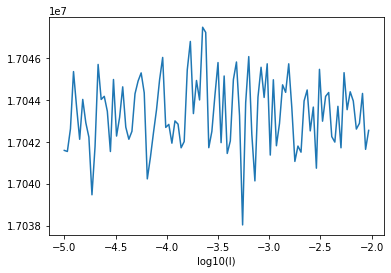

In [30]:
regr = GradientLR(0.01, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

In [ ]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
regr = GradientLR(0.01, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

In [ ]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
regr = GradientLR(0.01, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

Результаты сильно зависят от сгерерированного датасета. Часто оптимальным оказывается нулевой коэффицент, а иногда лучшие результаты показывает коэффицент порядка 1e-3. 

### Задание 5 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [ ]:
X, y = read_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [ ]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
print(mse(y_test, 0))

In [ ]:
regr = GradientLR(0.1, iterations=1000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
print(mse(y_test, 0))
build_plot(X_train, y_train, X_test, y_test, alpha=0.1, beg=-4, end=4.1)

Интересно, что градиентный спуск показывает лучшие результаты, чем точное решение оптимизационной задачи.
Вероятно происходит переобучение, потому что при большем количестве итераций результат снова ухудшается.
Также результат очень сильно зависит от альфы, при маленьких значениях нужно больше итераций чтобы сойтись достаточно хорошо.

In [ ]:
regr = GradientLR(0.1, iterations=1000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))


Путь при спуске пропорционален примерно iterations * alpha:

In [ ]:
regr = GradientLR(0.1, iterations=10, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.01, iterations=100, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.001, iterations=1000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

In [ ]:
regr = GradientLR(0.1, iterations=100, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.01, iterations=1000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.001, iterations=10000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

In [ ]:
regr = GradientLR(0.1, iterations=1000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.01, iterations=10000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.001, iterations=100000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

In [ ]:
regr = GradientLR(0.1, iterations=10000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.01, iterations=100000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.001, iterations=1000000, l=np.power(10, 3.25))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))